In [1]:
import sys
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/Users/jonathanlevin/Documents/UO/Courses/DSCI/410DL/Project/early-detection')  # CHANGE THIS TO YOUR PATH
from src.data_handler.dataloader import get_data_loaders

/opt/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <8E6D6BF5-9658-33B9-9D3C-DF587B2F99E7> /opt/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# plot the first batch of images from the dataset
# train_dir = '../data/split/train'
# mean, std = calculate_normalization_values(train_dir, config['transforms']['crop_size'], config['training']['batch_size'])

split_data_dir = '../data/split'

train_loader, val_loader, test_loader, num_classes, mean, std = get_data_loaders(split_data_dir, 256, 5)

print('Number of classes:', num_classes)
print('Mean:', mean)
print('Std:', std)
# get some random training images
images, labels = next(iter(train_loader))

print(images.shape)

/opt/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <8E6D6BF5-9658-33B9-9D3C-DF587B2F99E7> /opt/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN

Found 948 files in ../data/split/train
Files found: ['../data/split/train/EF2000/9a3860e90b18276e115513ff05e7b5ae_1.jpg', '../data/split/train/EF2000/5c91dfe302786b24f24a1ac4bb412140_1.jpg', '../data/split/train/EF2000/ff6e5445340599fa2fa407a80331f7cf_0.jpg', '../data/split/train/EF2000/67653c270031b9bed9bedce52cb3a26d_0.jpg', '../data/split/train/EF2000/b418daceb1d95bc31f54b264259181d7_11.jpg', '../data/split/train/EF2000/2277cdaea2579a33ad943ad88f902e12_0.jpg', '../data/split/train/EF2000/422c8bf3403ec4b920d8b947175f4376_2.jpg', '../data/split/train/EF2000/2702601828c12cfd6f19d653b7549c16_1.jpg', '../data/split/train/EF2000/f841f7db306acf7c32788a19e9112ce6_0.jpg', '../data/split/train/EF2000/5cb7ef731a666bdb7474dab718337286_0.jpg', '../data/split/train/EF2000/c93300fd767271d8296b2cf11dd0455d_0.jpg', '../data/split/train/EF2000/635d276fb84c2b15a4caa73000f12852_16.jpg', '../data/split/train/EF2000/0d4fe26b6df3e74aeccf1865f93c6328_0.jpg', '../data/split/train/EF2000/fffb908c9824dc0da884

/var/folders/jj/mntk53z114s91ncbd_rzyddc0000gn/T/ipykernel_51987/29415605.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)


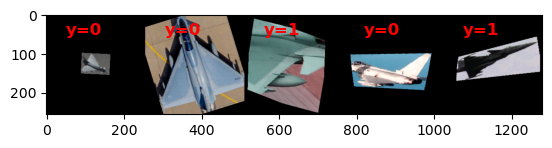

In [3]:
# plot images
plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)
plot_images = (plot_images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.imshow(np.hstack(plot_images))
for index, l in enumerate(labels):
    plt.text(index*256+50, 50, "y="+str(l.item()), color='red', fontsize=12,fontweight='bold')
plt.show()